# Meteocat

[Meteocat](https://www.meteo.cat) is the Catalan Meteorological Service. It provides a REST API to access its data. To use the Meteocat API, you first need to have an API key. You can get one by registering at [apidocs.meteocat.gencat.cat/section/informacio-general/plans-i-registre](https://apidocs.meteocat.gencat.cat/section/informacio-general/plans-i-registre). You can choose the "Accés ciutadà i administració" plan, which is free, or the paid "Accés professionals" plan. In both cases, you need to check the box "Dades de la XEMA" (automated weather stations) to get access to the data used in meteostations-geopy. You will then receive by mail the API key.

Let us now use the `MeteocatClient` class by instantiating it with the API key and the region of interest (which must be part of Catalonia so that it contains some stations).

In [ ]:
from meteostations.clients import MeteocatClient

API_KEY = "<your-api-key>"
region = "Conca de Barberà"

client = MeteocatClient(region, API_KEY)


Once instantiated, the `stations_gdf` property features the stations within the region, with its locations and other attributes:

In [ ]:
client.stations_gdf

,codi,nom,tipus,emplacament,altitud,estats,coordenades.latitud,coordenades.longitud,municipi.codi,municipi.nom,comarca.codi,comarca.nom,provincia.codi,provincia.nom,xarxa.codi,xarxa.nom,geometry
27,CW,l'Espluga de Francolí,A,Urb. Espluga Parc,446.0,"[{'codi': 2, 'dataInici': '1996-02-23T21:00Z',...",41.39241,1.09894,430542,L'Espluga de Francolí,16,Conca de Barberà,43,Tarragona,1,XEMA,POINT (1.09894 41.39241)
87,UJ,Santa Coloma de Queralt,A,Partida la Cabana,709.0,"[{'codi': 2, 'dataInici': '1996-11-19T20:00Z',...",41.52879,1.36830,431397,Santa Coloma de Queralt,16,Conca de Barberà,43,Tarragona,1,XEMA,POINT (1.36830 41.52879)
142,W8,Blancafort,A,"Cooperativa vinícola, pl.del Sindicat",438.0,"[{'codi': 2, 'dataInici': '2000-01-18T12:00Z',...",41.44237,1.15998,430290,Blancafort,16,Conca de Barberà,43,Tarragona,1,XEMA,POINT (1.15998 41.44237)



Similarly, the `variables_df` property features the available variables and its metadata:

In [ ]:
client.variables_df.head()

,codi,nom,unitat,acronim,tipus,decimals
0,1,Pressió atmosfèrica màxima,hPa,Px,DAT,1
1,2,Pressió atmosfèrica mínima,hPa,Pn,DAT,1
2,3,Humitat relativa màxima,%,HRx,DAT,0
3,4,Temperatura màxima de subsòl a 5 cm,°C,TSUBx5,DAT,1
4,5,Temperatura mínima de subsòl a 5 cm,°C,TSUBn5,DAT,1



Given a variable and a time range, the time seres data frame of measurements in the corresponding stations can be obtained with the `get_ts_df` method as in:

In [ ]:
variable = "temperature"
start_date = "2021-08-13"
end_date = "2021-08-16"

ts_df = client.get_ts_df(variable, start_date, end_date)
ts_df

codi,CW,UJ,W8
time,,,
2021-08-13 00:00:00+00:00,20.2,21.6,20.2
2021-08-13 00:30:00+00:00,19.8,20.5,19.6
2021-08-13 01:00:00+00:00,19.5,21.2,19.3
2021-08-13 01:30:00+00:00,20.1,22.0,19.2
2021-08-13 02:00:00+00:00,19.2,21.7,18.9
...,...,...,...
2021-08-16 21:30:00+00:00,20.6,18.8,20.6
2021-08-16 22:00:00+00:00,19.7,18.7,19.5
2021-08-16 22:30:00+00:00,19.3,17.8,19.3



The variable argument can be either: - a meteocat variable code (integer or string) or variable name (string) - see the "CODI_VARIABLE" and "NOM_VARIABLE" columns in ["Metadades variables meteorològiques"](https://analisi.transparenciacatalunya.cat/en/Medi-Ambient/Metadades-variables-meteorol-giques/4fb2-n3yi/data) - or an essential climate variable (ECV) following the meteostations-geopy nomenclature (string).

The returned object is a pandas data frame upon which we can operate using any of its supported functions, e.g.:

<Axes: xlabel='time'>

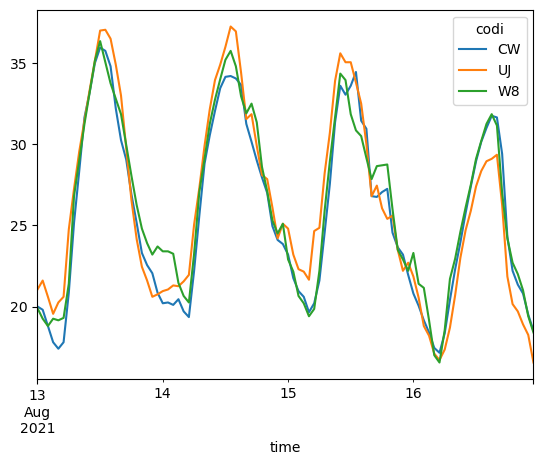

In [ ]:
ts_df.resample("H").mean().plot()


TODO: We can also use the `get_ts_gdf` method to include the locations of the stations along with the time series of measurements as in:

In [ ]:
# TODO: ts_gdf = client.get_ts_gdf(variable, start_date, end_date)